## Imports 

In [291]:
import pandas as pd 
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from missforest import MissForest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.inspection import permutation_importance
import lightgbm as lgb
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from statsmodels.tools.tools import add_constant
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score,precision_score, recall_score
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error, accuracy_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.metrics import *
from sklearn.tree import export_text
import joblib
from sklearn.model_selection import GridSearchCV


## Load data 

In [292]:
df = pd.read_csv("/workspaces/carlossuesc95-intro-ml/data/raw/internal-link tree.csv")
#df.shape(768,9)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000


## Exploratory data analysis

In [293]:
for col in df:
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())


Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64
Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64
BloodPres

In [294]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


### Usamos el discribe para ver bien con que datos estamos trabajando y obtener observaciones generales 

In [295]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


>### Observamos que hay valores 0 en columnas como Insulin, Glucosa, BloodPressure, BMI y SkinThickness.Habria que ver que correlacion tienen esos valores faltantes o que caracteristicas podemos sacar de estas columnas.


### 1.0 - Eliminación:

1. NO hay valores constantes
2. NO hay duplicados

In [296]:
dupl_data = df.duplicated().sum()
if dupl_data != 0:
    print(dupl_data)
else:
    print(f"No hay duplicados")



No hay duplicados


## Outcome values 

In [297]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### valores faltantes en forma de zero

In [298]:

zero_percent = ((df == 0).sum() / len(df) * 100).sort_values(ascending=False)
zero_percent.to_frame(name='percent_zeros')

,percent_zeros
Outcome,65.104
Insulin,48.698
SkinThickness,29.557
Pregnancies,14.453
BloodPressure,4.557
BMI,1.432
Glucose,0.651
DiabetesPedigreeFunction,0.000
Age,0.000


In [299]:
#Guardamos "insulin_zeros" en una lista para eliminarla del DataFrame
insulin_zeros = []
insulin_list = ((df['Insulin'] == 0).sum() / len(df) * 100)
insulin_zeros.append(insulin_list)
insulin_zeros
df.drop(columns=['Insulin'], inplace=True)
df_cop = df.copy()
vars_cero = ['SkinThickness', 'BloodPressure', 'BMI', 'Glucose']
df_cop[vars_cero] = df_cop[vars_cero].replace(0, np.nan)
df_cop.head(20).T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000,4.000,10.000,10.000,1.000,5.000,7.000,0.000,7.000,1.000,1.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000,110.000,168.000,139.000,189.000,166.000,100.000,118.000,107.000,103.000,115.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,NaN,70.000,96.000,92.000,74.000,80.000,60.000,72.000,NaN,84.000,74.000,30.000,70.000
SkinThickness,35.000,29.000,NaN,23.000,35.000,NaN,32.000,NaN,45.000,NaN,NaN,NaN,NaN,23.000,19.000,NaN,47.000,NaN,38.000,30.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,NaN,37.600,38.000,27.100,30.100,25.800,30.000,45.800,29.600,43.300,34.600
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232,0.191,0.537,1.441,0.398,0.587,0.484,0.551,0.254,0.183,0.529
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000,30.000,34.000,57.000,59.000,51.000,32.000,31.000,31.000,33.000,32.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000


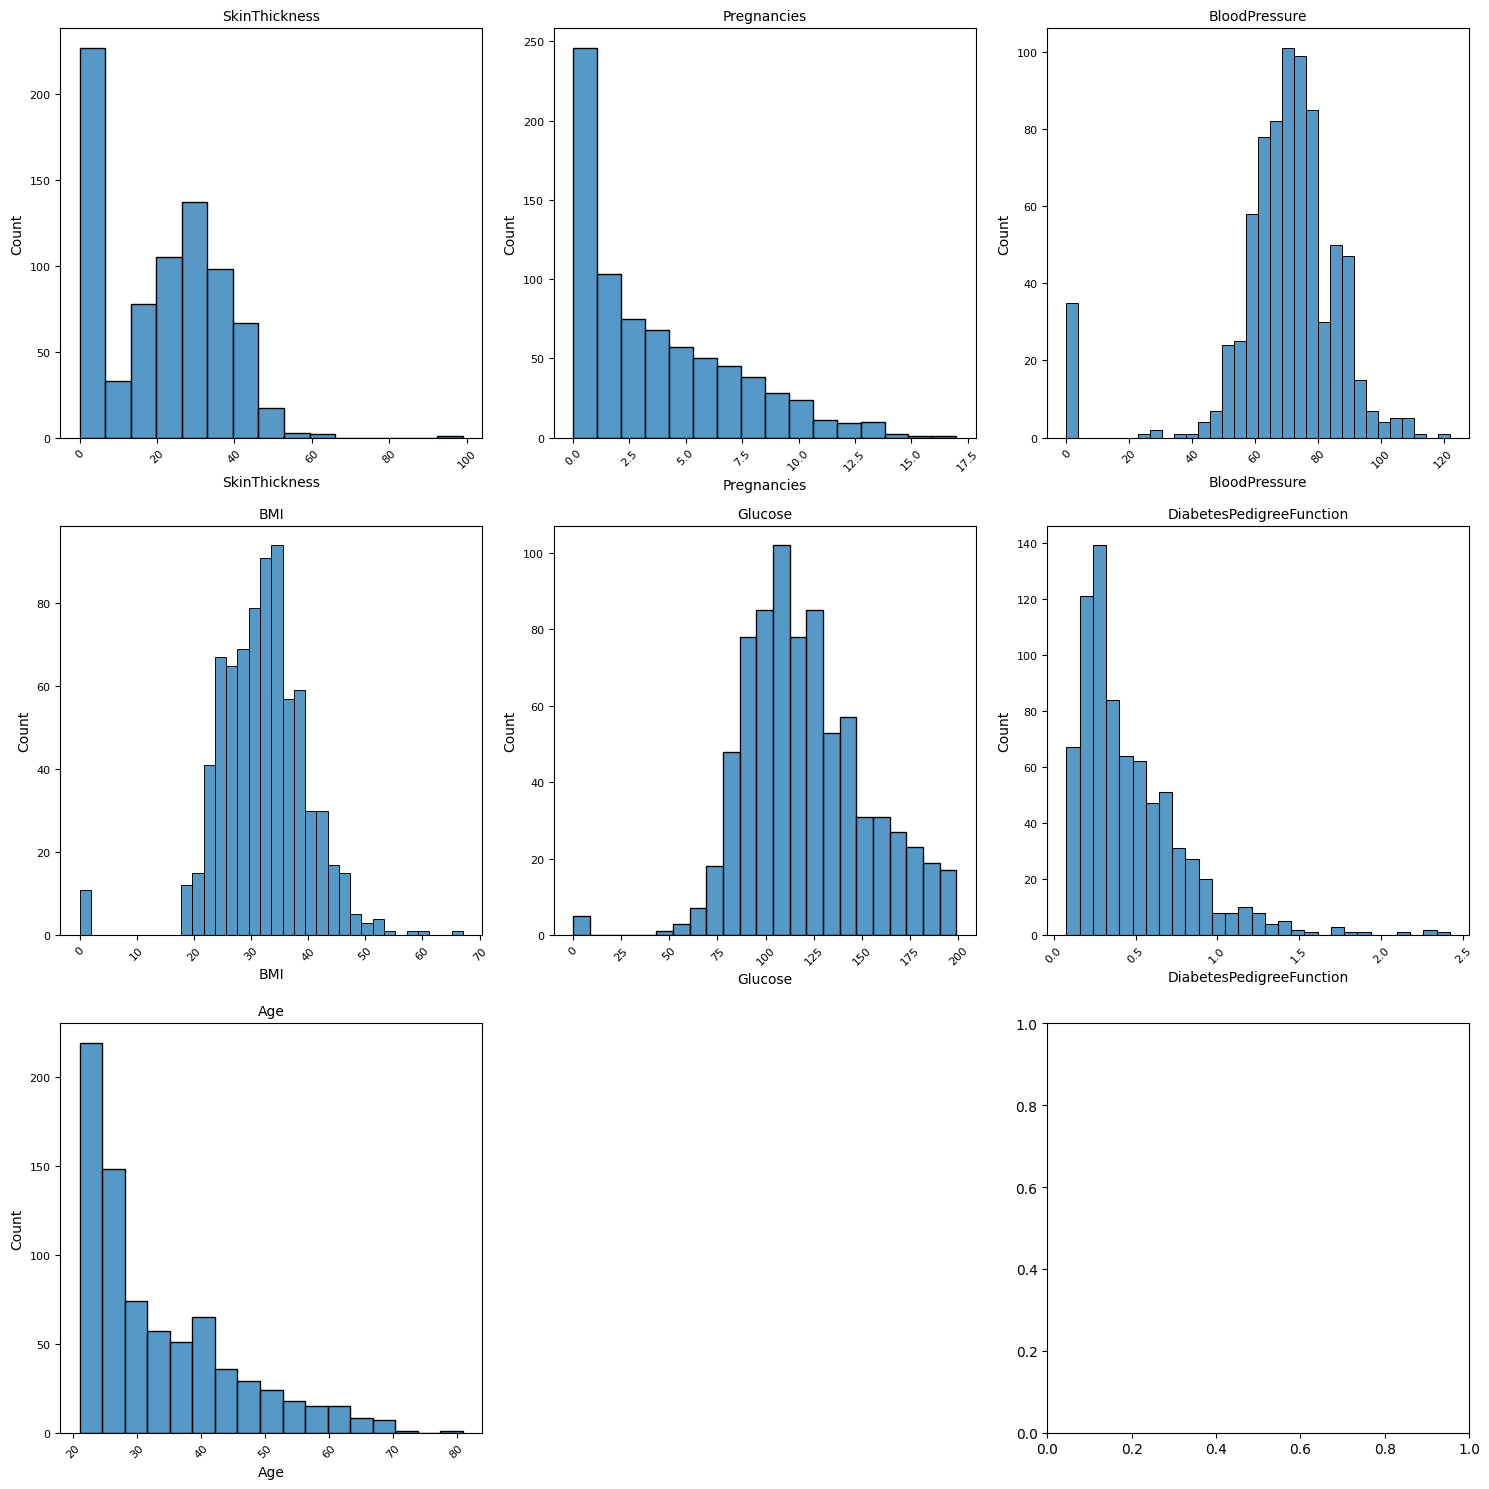

In [300]:


vars_to_plot = ['SkinThickness', 'Pregnancies', 'BloodPressure', 'BMI', 'Glucose', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(3, 3, figsize=(15, 15)) 
axes = axes.flatten()

for i, column in enumerate(vars_to_plot):
    sns.histplot(ax=axes[i], data=df, x=column)
    axes[i].set_title(column, fontsize=10) 
    axes[i].tick_params(axis='x', rotation=45, labelsize=8) 
    axes[i].tick_params(axis='y', labelsize=8) 

if len(vars_to_plot) < len(axes):
    fig.delaxes(axes[len(vars_to_plot)])

plt.tight_layout()
plt.show()

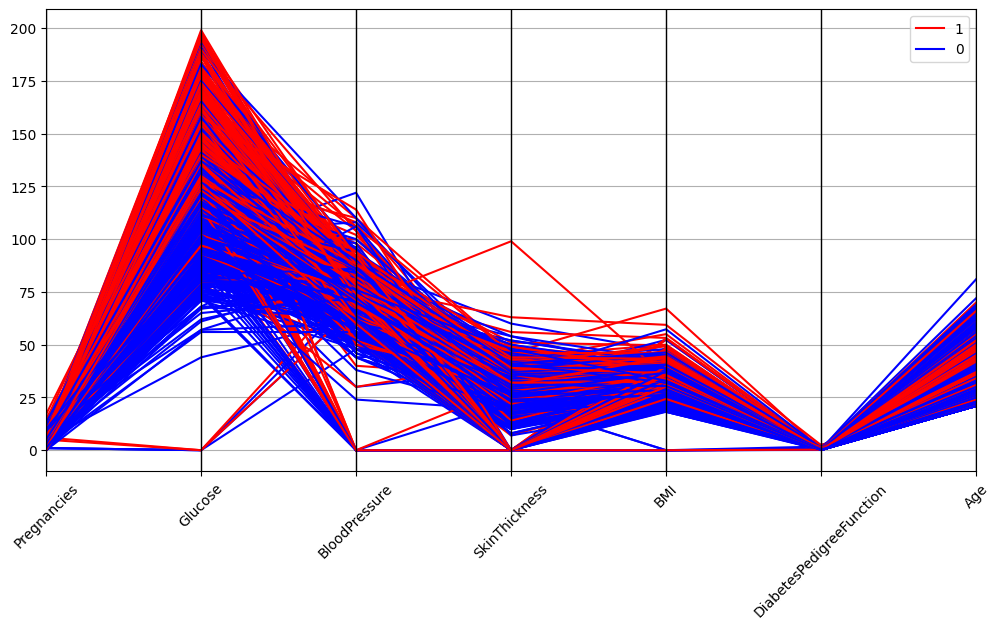

In [301]:
# Visualizamos la relación entre las características de nuestro dataset
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])

plt.xticks(rotation=45)
plt.show()

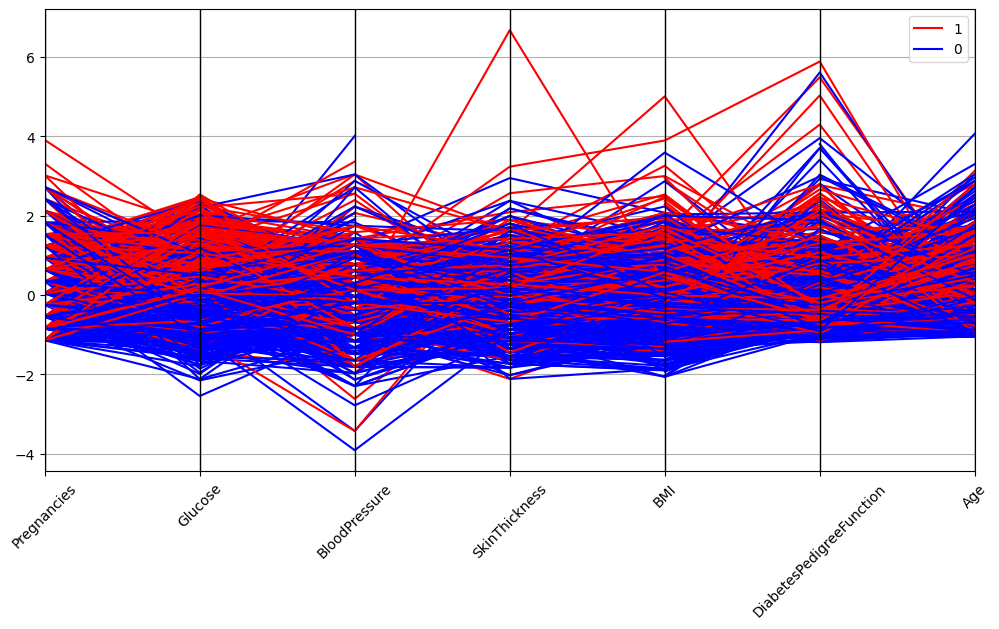

In [302]:
# VERSIÓN ESCALADA DEL DATASET PARA VISUALIZAR
df_sc = pd.DataFrame(data=StandardScaler().fit_transform(df_cop.drop(['Outcome'], axis=1)), columns=df_cop.columns[:-1])
df_sc['Outcome'] = df_cop.Outcome


# Visualizamos la relación entre las características de nuestro dataset
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

## Train Test Split 

In [303]:
X = df_cop.drop('Outcome',axis=1)
y = df_cop['Outcome']

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Outliers 

In [305]:
pd.set_option('display.float_format', '{:.3f}'.format)
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.000,3.743,3.313,0.000,1.000,3.000,6.000,17.000
Glucose,609.000,121.847,30.226,44.000,100.000,118.000,139.000,199.000
BloodPressure,590.000,72.239,12.343,24.000,64.000,72.000,80.000,122.000
SkinThickness,438.000,28.596,9.961,8.000,21.000,28.500,36.000,63.000
BMI,607.000,32.352,6.975,18.200,27.300,32.000,36.500,67.100
DiabetesPedigreeFunction,614.000,0.469,0.337,0.078,0.241,0.372,0.614,2.420
Age,614.000,32.907,11.503,21.000,24.000,29.000,40.000,81.000


In [306]:
iso = IsolationForest(random_state=123)
df_num = X_train.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train)
df_num['outlier_flag'].value_counts()

outlier_flag
 1    527
-1     87
Name: count, dtype: int64

In [307]:
outliers = df_num[df_num["outlier_flag"] == -1]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,outlier_flag
618,9,112.000,82.000,24.000,28.200,1.282,50,-1
294,0,161.000,50.000,NaN,21.900,0.254,65,-1
131,9,122.000,56.000,NaN,33.300,1.114,33,-1
673,3,123.000,100.000,35.000,57.300,0.880,22,-1
28,13,145.000,82.000,19.000,22.200,0.245,57,-1
...,...,...,...,...,...,...,...,...
459,9,134.000,74.000,33.000,25.900,0.460,81,-1
661,1,199.000,76.000,43.000,42.900,1.394,22,-1
458,10,148.000,84.000,48.000,37.600,1.001,51,-1
330,8,118.000,72.000,19.000,23.100,1.476,46,-1


## Imputación 

In [308]:
imputer = MissForest()

X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)
X_train_imp

/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:01<00:00,  2.94it/s]
/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process "
100%|██████████| 5/5 [00:00<00:00, 83.68it/s]
/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themse

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose,BMI,BloodPressure,SkinThickness
60,2,0.304,21,84.000,29.922,69.348,23.273
618,9,1.282,50,112.000,28.200,82.000,24.000
346,1,0.654,22,139.000,28.700,46.000,19.000
294,0,0.254,65,161.000,21.900,50.000,24.177
231,6,0.238,46,134.000,46.200,80.000,37.000
...,...,...,...,...,...,...,...
71,5,0.411,26,139.000,28.600,64.000,35.000
106,1,0.207,27,96.000,22.400,122.000,27.379
270,10,1.136,38,101.000,45.600,86.000,37.000
435,0,0.205,29,141.000,42.400,72.374,30.055


### Seleccion de caracteristicas:

#### Metodo 1

In [309]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)
model.fit(X_train_imp, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [310]:
# Importancia de características
importances = model.feature_importances_/model.feature_importances_.sum()*100

# Convertir a DataFrame
df_rf_imp = pd.DataFrame({'feature': X_train_imp.columns,'rf_importance': importances}).sort_values(by='rf_importance', ascending=False)

# Calculamos la importancia acumulada
df_rf_imp['rf_importance_acum'] = df_rf_imp['rf_importance'].cumsum()
df_rf_imp

,feature,rf_importance,rf_importance_acum
3,Glucose,27.084,27.084
4,BMI,16.906,43.990
2,Age,15.374,59.363
1,DiabetesPedigreeFunction,12.516,71.880
6,SkinThickness,11.024,82.903
5,BloodPressure,8.929,91.832
0,Pregnancies,8.168,100.000


#### Metodo 2

In [311]:
# Para esta técnica y la de shap se necesita conjunto de validación
X_train1, X_val, y_train1, y_val = train_test_split(X_train_imp, y_train, test_size=0.2, random_state=42)

# Ajustamos el modelo
model_xgb = XGBClassifier(objective='binary:logistic', random_state=42).fit(X_train1, y_train1)

In [312]:
# Realizamos 10 permutaciones por cada característica
perm = permutation_importance(model_xgb, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1, scoring='recall')

In [313]:
df_perm_imp = pd.DataFrame({'feature': X_train_imp.columns, 'perm_imp': perm.importances_mean*100}).sort_values('perm_imp', ascending=False)
df_perm_imp

,feature,perm_imp
3,Glucose,14.762
2,Age,4.286
6,SkinThickness,4.048
4,BMI,-1.667
0,Pregnancies,-2.381
5,BloodPressure,-2.857
1,DiabetesPedigreeFunction,-4.762


#### Metodo 3 

In [314]:
model_lgbm = lgb.LGBMClassifier(random_state=42,n_jobs=-1).fit(X_train1,y_train1)

explainer = shap.TreeExplainer(model_lgbm,X_val)
shap_vals = explainer(X_val)
                    

In [315]:
imp_shap = np.abs(shap_vals.values).mean(axis=0)
imp_shap_pct = imp_shap / imp_shap.sum() * 100

df_shap_imp = (
    pd.DataFrame({
        "feature": X_val.columns,
        "shap_imp": imp_shap_pct
    })
    .sort_values("shap_imp", ascending=False)
)

df_shap_imp

,feature,shap_imp
3,Glucose,28.669
4,BMI,17.572
2,Age,16.824
1,DiabetesPedigreeFunction,14.178
5,BloodPressure,8.389
0,Pregnancies,7.306
6,SkinThickness,7.062


### Union de los 3 metodos:

In [316]:
df_importances = (
    df_rf_imp
    .merge(df_perm_imp, on='feature', how='outer')
    .merge(df_shap_imp, on='feature', how='outer')
).sort_values('rf_importance', ascending=False)
df_importances

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
4,Glucose,27.084,27.084,14.762,28.669
1,BMI,16.906,43.990,-1.667,17.572
0,Age,15.374,59.363,4.286,16.824
3,DiabetesPedigreeFunction,12.516,71.880,-4.762,14.178
6,SkinThickness,11.024,82.903,4.048,7.062
2,BloodPressure,8.929,91.832,-2.857,8.389
5,Pregnancies,8.168,100.000,-2.381,7.306


In [317]:
df_filt = df_importances[(df_importances['rf_importance']>=1)&(df_importances['perm_imp'].abs()>=0.1)&(df_importances['shap_imp']>=1)]
df_filt

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
4,Glucose,27.084,27.084,14.762,28.669
1,BMI,16.906,43.990,-1.667,17.572
0,Age,15.374,59.363,4.286,16.824
3,DiabetesPedigreeFunction,12.516,71.880,-4.762,14.178
6,SkinThickness,11.024,82.903,4.048,7.062
2,BloodPressure,8.929,91.832,-2.857,8.389
5,Pregnancies,8.168,100.000,-2.381,7.306


In [318]:
features = df_filt['feature']
features

4                     Glucose
1                         BMI
0                         Age
3    DiabetesPedigreeFunction
6               SkinThickness
2               BloodPressure
5                 Pregnancies
Name: feature, dtype: object

## Vif 

In [319]:
X_vif = add_constant(X_train_imp[features])

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

Glucose                    1.172
BMI                        1.854
Age                        1.651
DiabetesPedigreeFunction   1.046
SkinThickness              1.718
BloodPressure              1.224
Pregnancies                1.448
dtype: float64

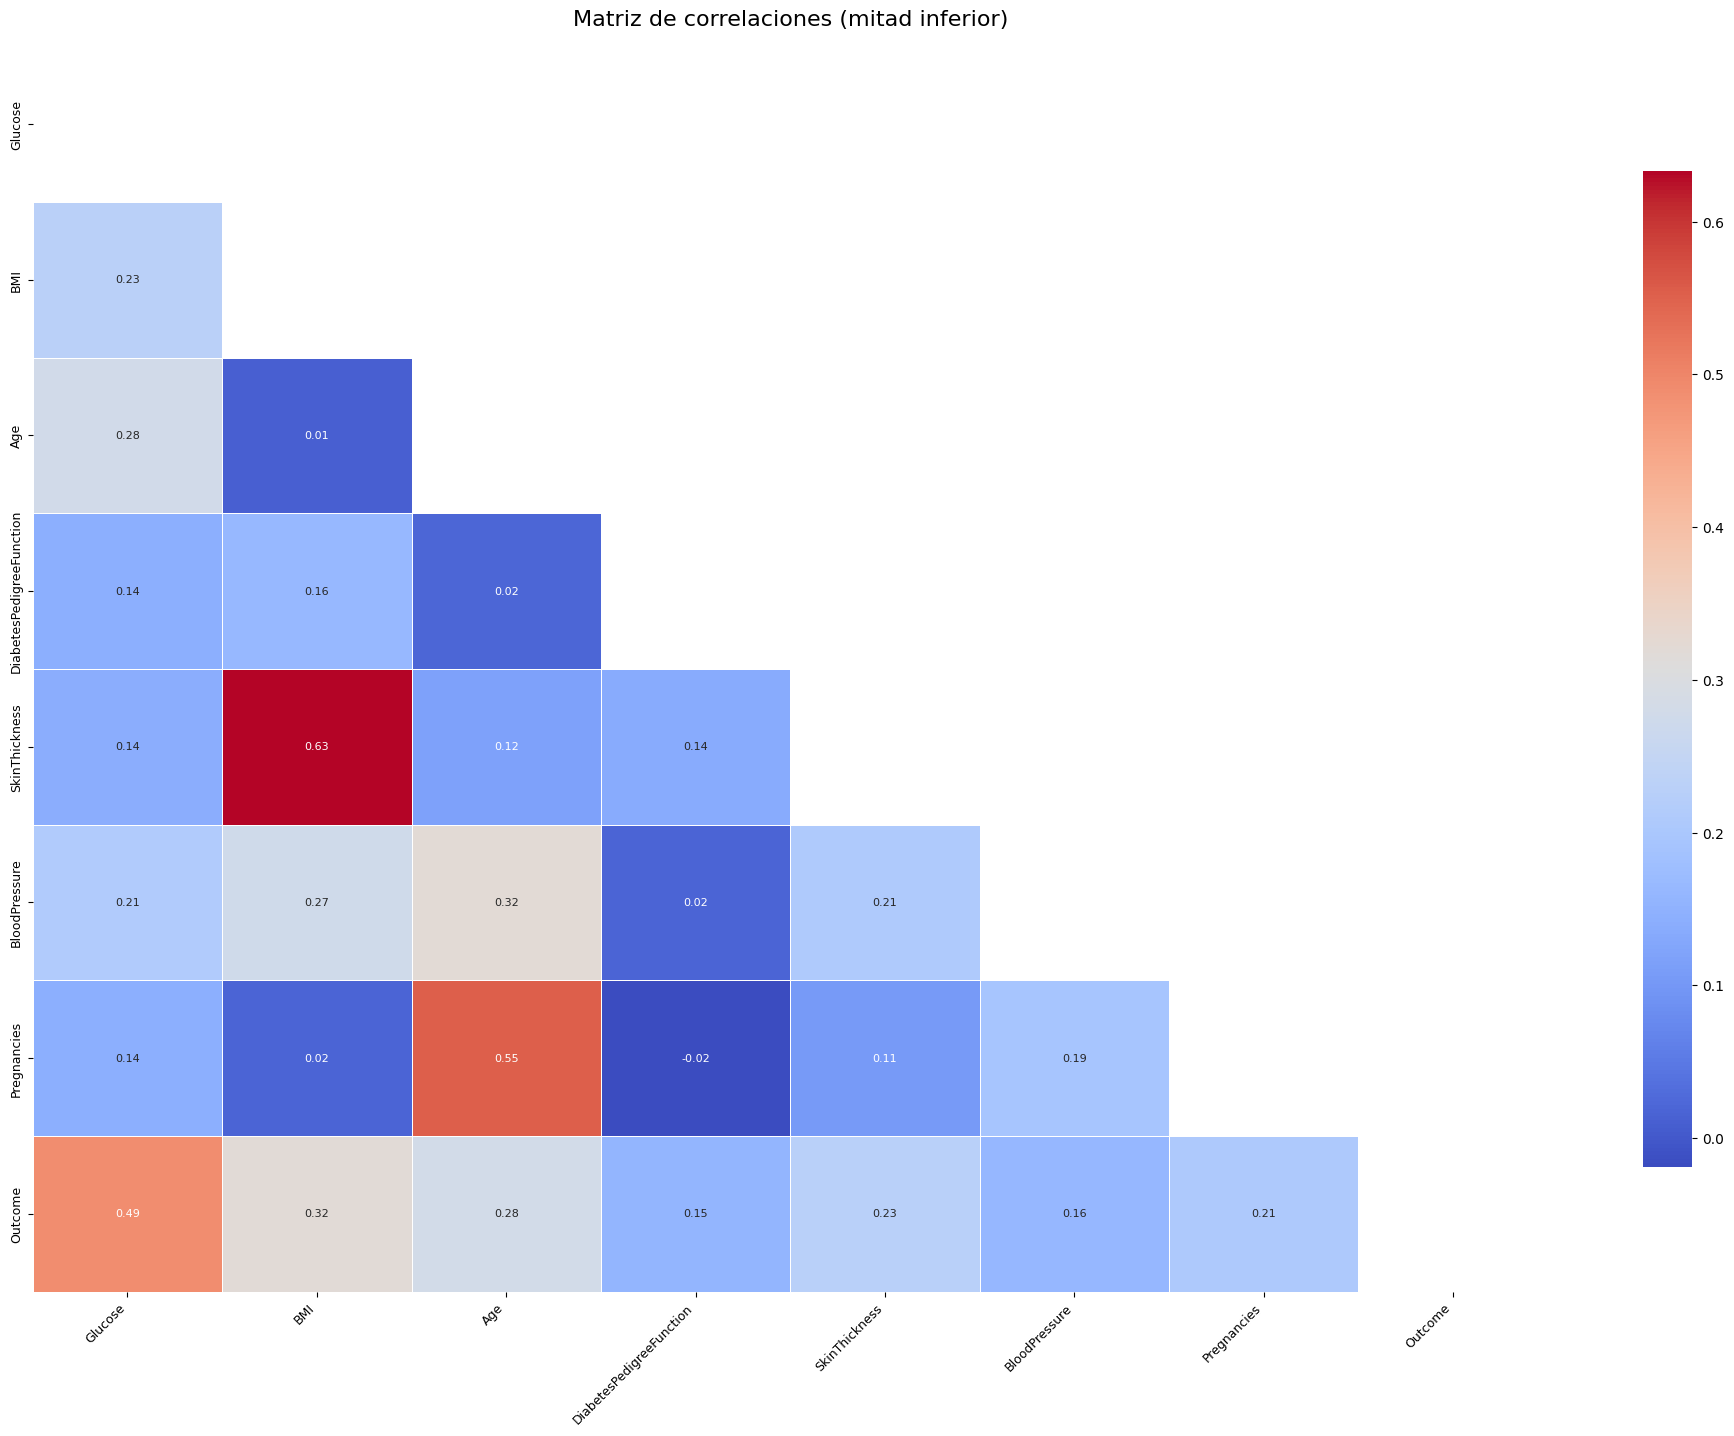

In [320]:
X_copy = X_train_imp[features].copy()
X_copy['Outcome'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

### Cross Validation:

In [321]:

# Versión 1: Realizar cross_validation con todas las características que son candidatas
cv_results1 = cross_val_score(RandomForestClassifier(random_state=42,n_jobs=-1, class_weight='balanced'),X_train_imp[features], y_train, cv=3, scoring='recall')

In [322]:
cv_results1.mean()

np.float64(0.5539906103286385)

In [323]:
#V2

cv_results2 = cross_val_score(RandomForestClassifier(random_state=42,n_jobs=-1,class_weight='balanced'),X_train_imp,y_train,cv=3,scoring='recall')
print(cv_results2)

[0.57746479 0.6056338  0.47887324]


In [324]:
cv_results2.mean()

np.float64(0.5539906103286385)

In [325]:

# Selecciona la caracteristicas con las que hemos determinado que vamos a proseguir el análisis
X_train_sel = X_train_imp[features]
X_test_sel = X_test_imp[features]

In [326]:
X_train_sel.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,614.000,121.824,30.108,44.000,100.000,118.000,139.000,199.000
BMI,614.000,32.332,6.940,18.200,27.325,32.000,36.375,67.100
Age,614.000,32.907,11.503,21.000,24.000,29.000,40.000,81.000
DiabetesPedigreeFunction,614.000,0.469,0.337,0.078,0.241,0.372,0.614,2.420
SkinThickness,614.000,28.546,8.672,8.000,23.000,28.218,33.000,63.000
BloodPressure,614.000,72.180,12.155,24.000,64.000,72.000,80.000,122.000
Pregnancies,614.000,3.743,3.313,0.000,1.000,3.000,6.000,17.000


## Arboles de decision


In [327]:
simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, random_state=42)
simple_tree.fit(X_train, y_train)

complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42)
complex_tree.fit(X_train, y_train)

# Evaluar el modelo complejo en entrenamiento y prueba
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)

# Evaluar el modelo simple en entrenamiento y prueba
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

### Get metrics 

In [328]:

def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    #train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    #test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    #diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall,],[test_accuracy, test_f1, test_auc, test_precision, test_recall],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [329]:
metrics_complex = get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)
metrics_complex


,Accuracy,F1,AUC,Precision,Recall
Train,1.000,1.000,1.000,1.000,1.000
Test,0.708,0.587,0.680,0.593,0.582
Diferencia,0.292,0.413,0.320,0.407,0.418


In [330]:
metrics_simple = get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)
metrics_simple

,Accuracy,F1,AUC,Precision,Recall
Train,0.751,0.546,0.676,0.742,0.432
Test,0.727,0.512,0.655,0.710,0.400
Diferencia,0.024,0.034,0.022,0.032,0.032


### Matriz de confusión

In [331]:
# Matriz de confusión
cm = confusion_matrix(y_test, test_pred_simple)
cm

array([[90,  9],
       [33, 22]])

In [332]:

text_representation = export_text(simple_tree, feature_names=list(X_train_sel.columns))
print(text_representation)

|--- Pregnancies <= 28.50
|   |--- SkinThickness <= 30.95
|   |   |--- BMI <= 127.50
|   |   |   |--- class: 0
|   |   |--- BMI >  127.50
|   |   |   |--- class: 0
|   |--- SkinThickness >  30.95
|   |   |--- BMI <= 127.50
|   |   |   |--- class: 0
|   |   |--- BMI >  127.50
|   |   |   |--- class: 1
|--- Pregnancies >  28.50
|   |--- BMI <= 155.50
|   |   |--- BloodPressure <= 0.20
|   |   |   |--- class: 0
|   |   |--- BloodPressure >  0.20
|   |   |   |--- class: 0
|   |--- BMI >  155.50
|   |   |--- BloodPressure <= 0.31
|   |   |   |--- class: 1
|   |   |--- BloodPressure >  0.31
|   |   |   |--- class: 1



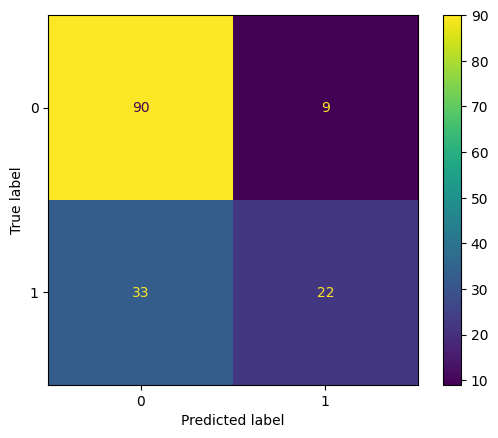

In [333]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()

In [334]:

#text_representation = export_text(simple_tree, feature_names=list(X_train.columns))
#rint(text_representation)

## Criterios de pureza

In [335]:
model = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5, 6, 8, None],
              'min_samples_leaf': [5, 10, 15, 20, 25],
              'max_features': [None, 'sqrt', 'log2', 0.5],
              'min_samples_split': [2, 5, 10, 20]}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Ajuste
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=2; total time=   0.0s


[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_s

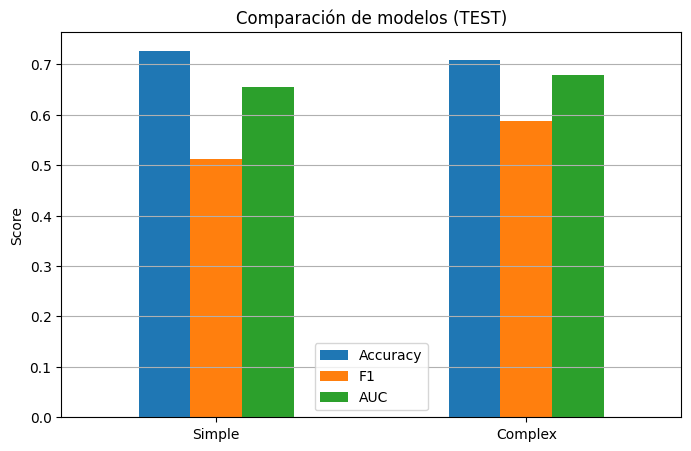

In [336]:
metrics_test = pd.DataFrame({
    'Simple': metrics_simple.loc['Test'],
    'Complex': metrics_complex.loc['Test']
}).T

metrics_test[['Accuracy', 'F1', 'AUC']].plot(
    kind='bar',
    figsize=(8,5)
)

plt.title('Comparación de modelos (TEST)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Exportación del Modelo 

In [337]:
joblib.dump(model, 'modelo_dt_diabetes.pkl')

['modelo_dt_diabetes.pkl']